# Time Series Wind Roses

When dealing with Air Quality Time Series, it is important to assess how distributions are affected by Wind Direction.

The Weather Toolbox provides a Wind object to ease such analysis.

## Introduction


### Imports

We import required packages:

In [1]:
import numpy as np
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox import Wind

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("brussels_2014.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

## Roses and Boxplots

We will perform our analysis on the following series:

In [4]:
skeys = ['NO/41R001 (µg/m³)', 'PM-2.5/41N043 (µg/m³)', 'CO2/41R002 (ppm)',
          'O3/41R012 (µg/m³)', 'T/41R001 (°C)', 'WS/41R001 (m/s)']

In [5]:
SO2 = data.filter(regex="SO2").columns

In [6]:
q = (data.index >= "2014-09-19") & (data.index <= "2014-09-26")
q = data.index

In [7]:
data.loc[q]

seriekey,BC/41N043 (µg/m³),BC/41R001 (µg/m³),BC/41R002 (µg/m³),BC/41R012 (µg/m³),CO/41B004 (mg/m³),CO/41B006 (mg/m³),CO/41B008 (mg/m³),CO/41N043 (mg/m³),CO/41R001 (mg/m³),CO/41R002 (mg/m³),...,SO2/41R001 (µg/m³),SO2/41R002 (µg/m³),SO2/41R012 (µg/m³),T/41B011 (°C),T/41R001 (°C),T/41R012 (°C),WD/41R001 (°G),WD/41R012 (°G),WS/41R001 (m/s),WS/41R012 (m/s)
start,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00+01:00,NaN,0.815,1.650,0.645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00+01:00,NaN,0.960,1.495,0.595,NaN,0.190,0.260,0.465,0.250,0.220,...,2.0,4.0,2.5,6.60,7.15,6.70,211.0,210.0,4.005,4.905
2014-01-01 02:00:00+01:00,NaN,0.635,1.315,0.460,NaN,NaN,0.215,0.660,0.215,0.195,...,2.0,4.0,2.0,6.80,7.35,6.90,224.0,218.0,5.260,5.895
2014-01-01 03:00:00+01:00,NaN,0.500,1.930,0.365,NaN,0.160,0.260,0.580,0.205,0.190,...,2.0,4.0,2.0,6.60,7.30,6.65,213.0,204.0,4.390,4.610
2014-01-01 04:00:00+01:00,NaN,0.465,1.025,0.400,NaN,0.135,0.190,0.275,0.200,0.200,...,2.0,3.0,NaN,6.05,6.90,6.00,200.0,192.0,4.355,4.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+01:00,10.455,5.250,3.755,4.150,0.455,NaN,0.495,0.470,NaN,0.450,...,4.0,6.5,4.5,3.30,3.85,1.05,212.0,208.0,2.560,1.900
2014-12-31 20:00:00+01:00,8.400,4.410,3.715,3.740,0.470,NaN,0.475,0.500,0.605,0.515,...,4.0,7.0,4.5,2.70,3.20,0.85,216.0,207.0,2.655,1.980
2014-12-31 21:00:00+01:00,7.720,3.860,4.310,4.605,0.515,NaN,0.500,0.505,0.540,NaN,...,3.0,6.5,4.0,2.40,2.80,0.25,214.0,217.0,2.630,1.985


In [8]:
scales = client.scales()
scales

{'BC': array([ 0, 10]),
 'CO2': array([350, 550]),
 'CO': array([0, 2]),
 'NO2': array([  0, 200]),
 'NO': array([  0, 200]),
 'O3': array([  0, 200]),
 'PM-10.0': array([  0, 150]),
 'PM-2.5': array([  0, 100]),
 'RH': array([  0, 100]),
 'SO2': array([ 0, 15]),
 'T': array([-15,  40]),
 'TOL': array([ 0, 25]),
 'p': array([ 950, 1150]),
 'WD': array([  0, 360]),
 'WS': array([ 0, 15]),
 'BZN': array([ 0, 10]),
 'EBZ': array([0, 5]),
 'MPX': array([0, 5]),
 'OXL': array([0, 5])}

In [9]:
scales["NO"][1] = 100
scales["PM-2.5"][1] = 40
scales["CO2"][1] = 450
scales["O3"][1] = 100
scales["T"][1] = 30
scales["WS"][1] = 6

**Note:** There is a difference between Goniometric and Trigonometric systems. By defaults, Weather methods expect to get Goniometric angles (common meteorological reference) instead of Trigonometric angles.

NO/41R001 (µg/m³)
PM-2.5/41N043 (µg/m³)
CO2/41R002 (ppm)
O3/41R012 (µg/m³)
T/41R001 (°C)
WS/41R001 (m/s)


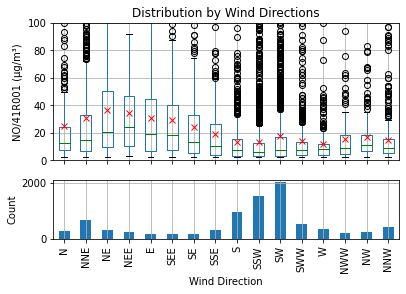

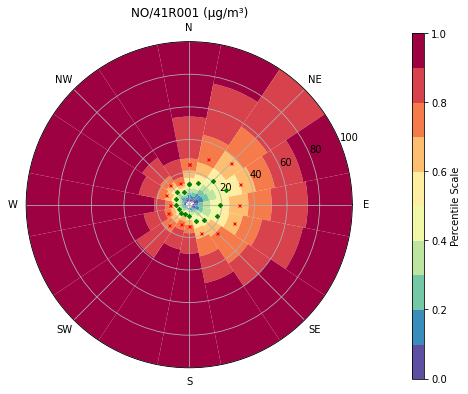

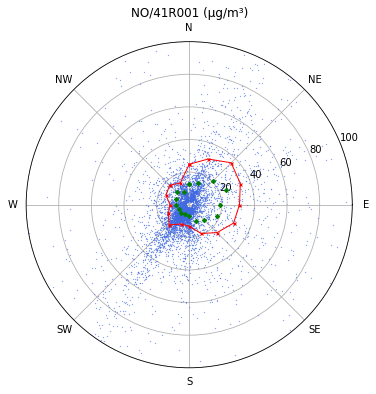

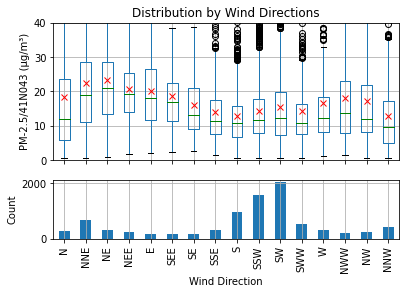

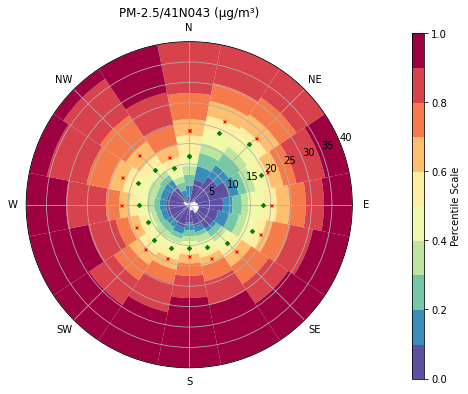

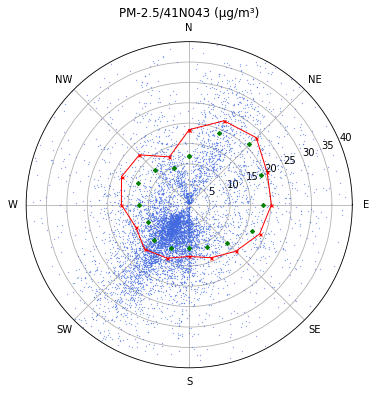

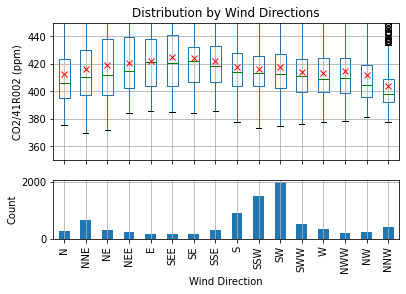

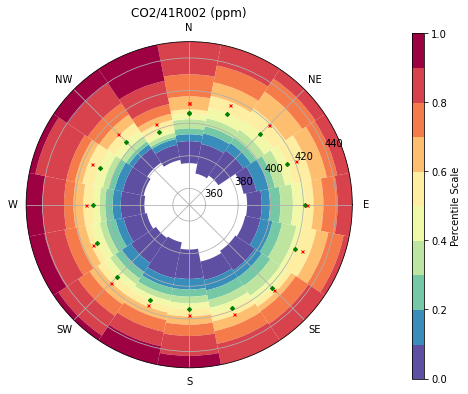

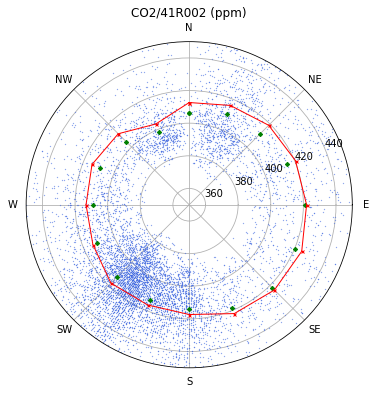

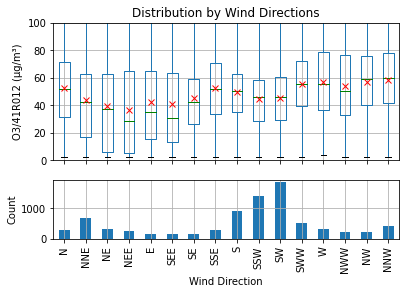

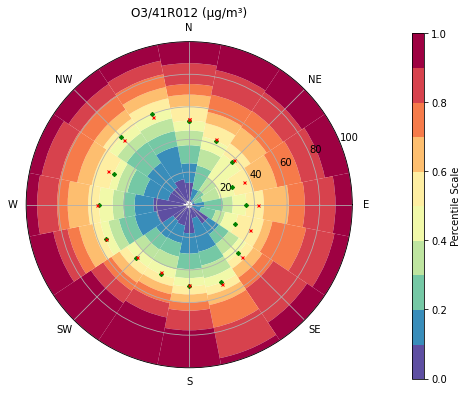

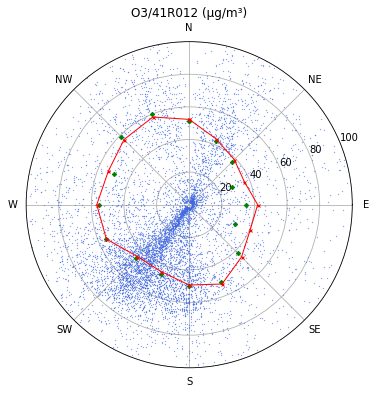

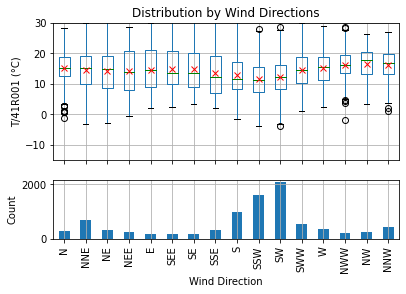

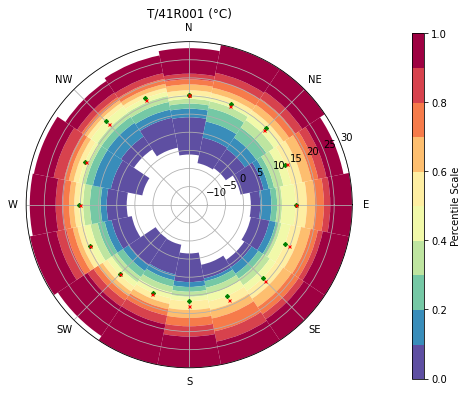

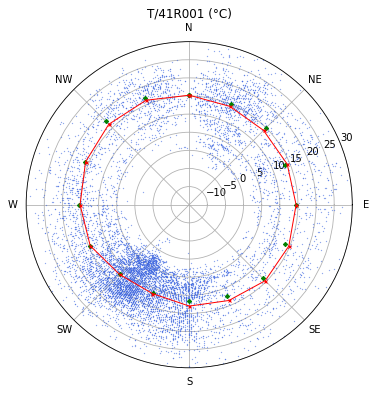

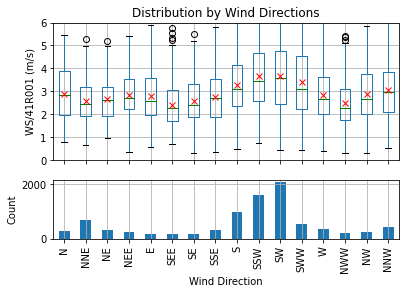

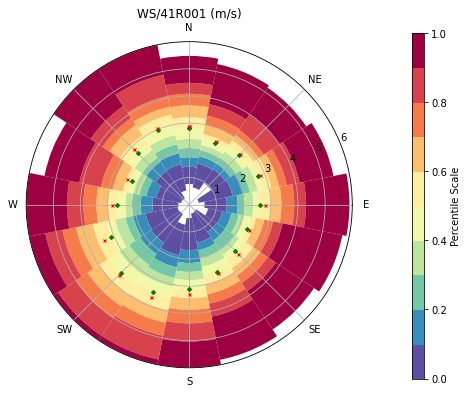

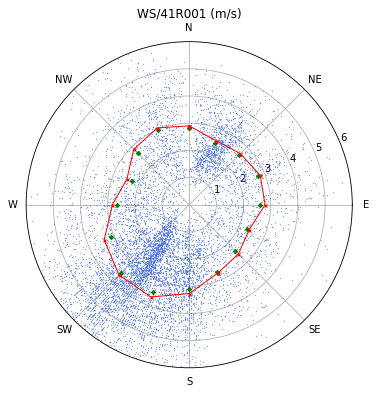

In [10]:
for k in skeys:
    print(k)
    axe1 = Wind.boxplot(data.loc[q], k, theta='WD/41R001 (°G)')
    axe1[0].set_ylim(scales[k.split('/')[0]])
    axe2 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)')
    axe2.set_ylim(scales[k.split('/')[0]])
    axe3 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)', quantiles=False, points=True, mean_linewidth=1.0)
    axe3.set_ylim(scales[k.split('/')[0]])
    #break